## Coefficient calculations (Do the same for TB2)

In [1]:
delta = 0.012
rho = 1.225
s = 0.05
A = 0.503
omega = 300
r = 0.4
U_tip = 120
k = 0.1
v_0 = 4.03
d_0 = 0.6

P_0 = (delta / 8) * rho * s * A * (omega**3) * (r ** 3)

mu_1 = P_0
mu_2 = P_0 *(3 / (U_tip ** 2))
mu_3 = P_0 * v_0
mu_4 = (1/2) * d_0 * rho * s * A

print("mu_1=", mu_1)
print("mu_2=", mu_2)
print("mu_3=", mu_3)
print("mu_4=", mu_4)

mu_1= 79.85628000000003
mu_2= 0.016636725000000005
mu_3= 321.82080840000015
mu_4= 0.009242624999999999


$$ E(v,d) = ​\mu_1\frac{d}{v}+\mu_2dv+\mu_3\frac{d}{v^2}+\mu_4dv^2 $$
$$= 79.8563\frac{d}{v}+0.0166dv+321.8208\frac{d}{v^2}+0.0092dv^2$$

In [6]:
def energy(v,d):
    
    mu_1= 79.85628000000003
    mu_2= 0.016636725000000005
    mu_3= 321.82080840000015
    mu_4= 0.009242624999999999
    
    return mu_1 * d/v + mu_2 * d*v + mu_3 * d/(v**2) + mu_4 * d * (v**2) 

import math
d=200*math.sqrt(2)
energy(23, d)

2645.2475463209294

In [ ]:
def energy_fixed_wing(v,d):
    return 0.0905 * d * (v**2) + (349095 * d) / (v**2)

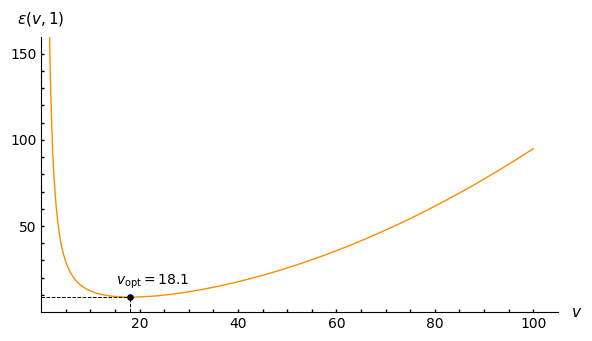

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter, MaxNLocator

# Speed domain
v = np.linspace(1, 100, 800)

# Energy consumption model (one clear minimum)
E = energy(v, d=1)

# Find minimum
idx = np.argmin(E)
v_opt = v[idx]
E_opt = E[idx]

# Plot
plt.figure(figsize=(6, 4))
plt.plot(v, E, color='darkorange', linewidth=1)

# Mark and label the minimum
plt.scatter(v_opt, E_opt, color='black', zorder=3, s=14)

plt.annotate(
    rf"$v_{{\mathrm{{opt}}}} = {v_opt:.1f}$",
    xy=(v_opt, E_opt),
    xytext=(v_opt-3 , E_opt + 7),
    fontsize=10
)


# Axis limits and ticks
plt.xlim(0, 105)
plt.ylim(0, 160)

# Axis ticks (split into intervals)
plt.xticks(np.arange(0, 101, 10))
#plt.yticks(np.arange(0, 151, 25))

# Y-axis: ticks every 10, labels every 50
ax = plt.gca()

ax.spines["left"].set_position(("data", 0))
ax.spines["bottom"].set_position(("data", 0))

ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_formatter(
    FuncFormatter(lambda y, _: f"{int(y)}" if y % 50 == 0 else "")
)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(
    FuncFormatter(lambda x, _: f"{int(x)}" if x % 20 == 0 else "")
)

ax.set_xticks([t for t in ax.get_xticks() if 0 < t <= 100])
ax.set_yticks([t for t in ax.get_yticks() if 0 < t <= 150])

ax.tick_params(
    axis="both",
    direction="in",   # ticks point inward
    length=2,
    width=1
)

# Remove top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Axis labels placed at the ends of axes
ax.text(
    110, 4, "$v$",
    ha="right", va="top", fontsize=11,
)

ax.text(
    -5, 165, "$\epsilon(v,1)$",
    ha="left", va="bottom", fontsize=11
)


# add dashed line to show optimum energy consumption
ax.vlines(v_opt, 0, E_opt,colors="black",linestyles="dashed",linewidth=0.7)
ax.hlines(E_opt, 0, v_opt,colors="black",linestyles="dashed",linewidth=0.7)

# equal scaling of x and y units
ax.set_aspect(0.35)

plt.grid(False)
plt.tight_layout()
plt.show()



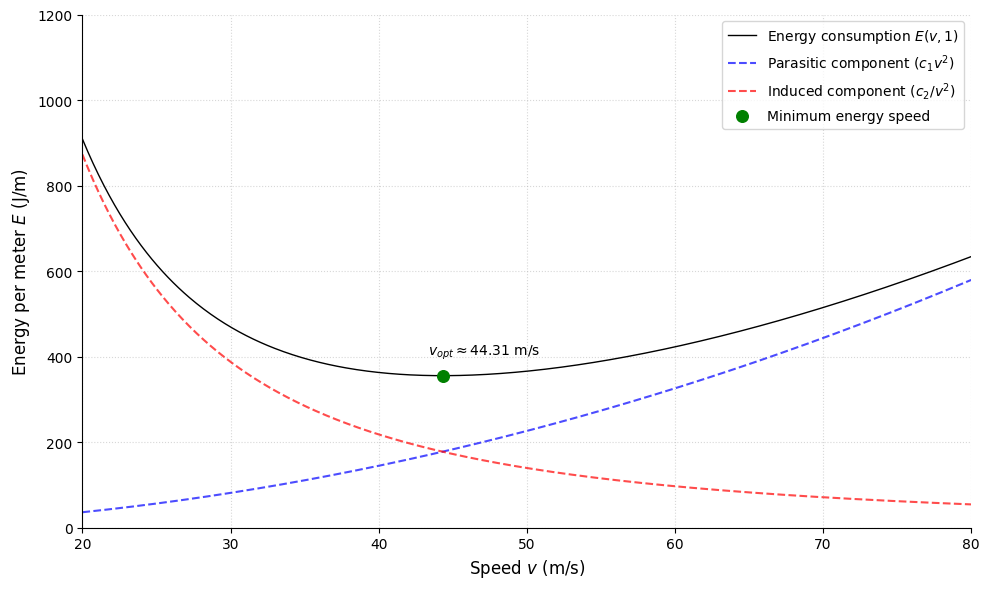

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter, MaxNLocator

# Coefficients calculated for Bayraktar TB2
c0 = 0
c1 = 0.0905271
c2 = 349095.7929
v_opt = 44.314

# Define speed range (from 20 m/s to 80 m/s)
v = np.linspace(20, 80, 500)

# Calculate energy components per meter (d=1)
# E(v, 1) = c0/v + c1*v^2 + c2/v^2
e_parasitic = c1 * v**2
e_induced = c2 / v**2
e_total = (c0 / v) + e_parasitic + e_induced

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(v, e_total, label=r'Energy consumption $E(v,1)$', color='black', linewidth=1)
plt.plot(v, e_parasitic, label=r'Parasitic component ($c_1 v^2$)', linestyle='--', color='blue', alpha=0.7)
plt.plot(v, e_induced, label=r'Induced component ($c_2 / v^2$)', linestyle='--', color='red', alpha=0.7)

# Highlight Optimum Point
e_min = (c0 / v_opt) + c1 * v_opt**2 + c2 / v_opt**2
plt.scatter([v_opt], [e_min], color='green', s=70, zorder=5, label='Minimum energy speed')
plt.annotate(f'$v_{{opt}} \\approx {v_opt:.2f}$ m/s',
             xy=(v_opt, e_min), xytext=(v_opt-1, e_min + 50),
             #arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=4)
             )

# Remove top and right spines
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# add dashed line to show optimum energy consumption
#ax.vlines(v_opt, 0, e_min,colors="black",linestyles="dashed",linewidth=0.4)


# Labels and styling
#plt.title('Energy Consumption per Meter vs. Flight Speed (Bayraktar TB2)', fontsize=14)
plt.xlabel('Speed $v$ (m/s)', fontsize=12)
plt.ylabel('Energy per meter $E$ (J/m)', fontsize=12)
plt.grid(True, which='both', linestyle=':', alpha=0.5)
#plt.grid(False)
plt.legend()
plt.ylim(0, 1200) 
plt.xlim(20, 80)

plt.tight_layout()
plt.savefig('energy_vs_speed.png')

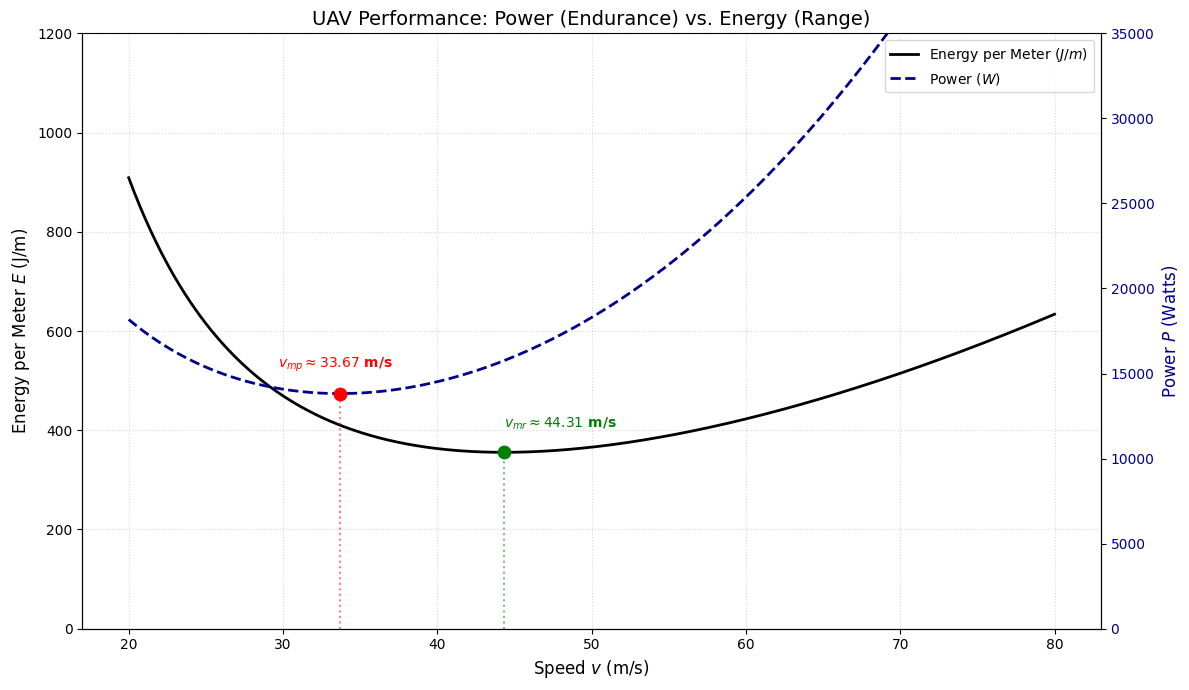

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Coefficients for Bayraktar TB2
c0 = 0
c1 = 0.0905271
c2 = 349095.7929

# Theoretical Optima
v_mr = (c2 / c1)**(1/4)        # Max Range (Min Energy per Meter)
v_mp = (c2 / (3 * c1))**(1/4)  # Min Power (Max Endurance)

# Speed range
v = np.linspace(20, 80, 500)

# Calculations
power = c1 * v**3 + c2 / v     # Power Function (Watts)
energy = c1 * v**2 + c2 / v**2 # Energy per Meter (J/m)

fig, ax1 = plt.subplots(figsize=(12, 7))

# --- Plot Energy per Meter (Left Axis) ---
color_e = 'black'
ax1.set_xlabel('Speed $v$ (m/s)', fontsize=12)
ax1.set_ylabel('Energy per Meter $E$ (J/m)', color=color_e, fontsize=12)
line1 = ax1.plot(v, energy, color=color_e, linewidth=2, label='Energy per Meter ($J/m$)')
ax1.tick_params(axis='y', labelcolor=color_e)
ax1.set_ylim(0, 1200)

# Highlight v_mr
e_min = c1 * v_mr**2 + c2 / v_mr**2
ax1.scatter([v_mr], [e_min], color='green', s=80, zorder=5)
ax1.annotate(f'$v_{{mr}} \\approx {v_mr:.2f}$ m/s', 
             xy=(v_mr, e_min), xytext=(v_mr, e_min + 50),
             color='green', fontweight='bold')

# --- Plot Power (Right Axis) ---
ax2 = ax1.twinx()  # Create second axis
color_p = 'darkblue'
ax2.set_ylabel('Power $P$ (Watts)', color=color_p, fontsize=12)
line2 = ax2.plot(v, power, color=color_p, linestyle='--', linewidth=2, label='Power ($W$)')
ax2.tick_params(axis='y', labelcolor=color_p)
ax2.set_ylim(0, 35000)

# Highlight v_mp
p_min = c1 * v_mp**3 + c2 / v_mp
ax2.scatter([v_mp], [p_min], color='red', s=80, zorder=5)
ax2.annotate(f'$v_{{mp}} \\approx {v_mp:.2f}$ m/s', 
             xy=(v_mp, p_min), xytext=(v_mp-4, p_min + 1500),
             color='red', fontweight='bold')

# Helper lines for visual comparison
ax1.vlines(v_mr, 0, e_min, colors='green', linestyles=':', alpha=0.5)
ax2.vlines(v_mp, 0, p_min, colors='red', linestyles=':', alpha=0.5)

# Aesthetics
ax1.spines["top"].set_visible(False)
ax1.grid(True, which='both', linestyle=':', alpha=0.5)
plt.title('UAV Performance: Power (Endurance) vs. Energy (Range)', fontsize=14)

# Combine legends
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')

plt.tight_layout()
plt.show()